In [9]:
from RT_prediction.RT_prediction import *
from sklearn.model_selection import train_test_split
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import matplotlib
matplotlib.rcParams['figure.dpi'] = 500

In [2]:
RT_pred = RT_predictor(n_jobs=20)

In [3]:
data = RT_pred.get_training_data_pHILIC_IROA()

In [4]:
goodCols = RT_pred.get_good_desc(data)
        
print(len(goodCols))
goodCols.remove("RT")
print(goodCols)


Unnamed: 0 : non-real valued descriptor
Name : non-real valued descriptor
121
['XLogP', 'MW', 'LipinskiFailures', 'nRotB', 'MLogP', 'nAtomLAC', 'nAtomP', 'nAtomLC', 'nB', 'nBase', 'nAromBond', 'naAromAtom', 'ALogP', 'ALogp2', 'AMR', 'nAcid', 'nSmallRings', 'nAromRings', 'nRingBlocks', 'nAromBlocks', 'nRings3', 'nRings5', 'nRings6', 'tpsaEfficiency', 'Zagreb', 'WPATH', 'WPOL', 'WTPT.1', 'WTPT.3', 'WTPT.4', 'WTPT.5', 'VAdjMat', 'TopoPSA', 'topoShape', 'PetitjeanNumber', 'MDEC.11', 'MDEC.12', 'MDEC.13', 'MDEC.14', 'MDEC.22', 'MDEC.23', 'MDEC.24', 'MDEC.33', 'MDEC.34', 'MDEC.44', 'MDEO.11', 'MDEO.12', 'MDEO.22', 'MDEN.11', 'MDEN.12', 'MDEN.13', 'MDEN.22', 'MDEN.23', 'MDEN.33', 'fragC', 'FMF', 'ECCEN', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6', 'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5', 'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7', 'V

In [5]:
X = data.loc[:,goodCols].to_numpy()
y = data["RT"].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 20)

In [13]:
if __name__ == "__main__":
    result = {}
    num_trees_to_try = [1,10,100,500]
    msToTry = [int(x) for x in np.linspace(1,len(X_train[0]),10)]
    mds = [1,10,100,200]
    
    for nest in num_trees_to_try:
        for m in msToTry:
            for md in mds:
                print(nest,m,md)
                result[(nest,m,md)] = RT_pred.crossValPrediction(X_train,y_train,nest,m,md)

1 1 1
1 1 10
1 1 100
1 1 200
1 14 1
1 14 10
1 14 100
1 14 200
1 27 1
1 27 10
1 27 100
1 27 200
1 40 1
1 40 10
1 40 100
1 40 200
1 53 1
1 53 10
1 53 100
1 53 200
1 67 1
1 67 10
1 67 100
1 67 200
1 80 1
1 80 10
1 80 100
1 80 200
1 93 1
1 93 10
1 93 100
1 93 200
1 106 1
1 106 10
1 106 100
1 106 200
1 120 1
1 120 10
1 120 100
1 120 200
10 1 1
10 1 10
10 1 100
10 1 200
10 14 1
10 14 10
10 14 100
10 14 200
10 27 1
10 27 10
10 27 100
10 27 200
10 40 1
10 40 10
10 40 100
10 40 200
10 53 1
10 53 10
10 53 100
10 53 200
10 67 1
10 67 10
10 67 100
10 67 200
10 80 1
10 80 10
10 80 100
10 80 200
10 93 1
10 93 10
10 93 100
10 93 200
10 106 1
10 106 10
10 106 100
10 106 200
10 120 1
10 120 10
10 120 100
10 120 200
100 1 1
100 1 10
100 1 100
100 1 200
100 14 1
100 14 10
100 14 100
100 14 200
100 27 1
100 27 10
100 27 100
100 27 200
100 40 1
100 40 10
100 40 100
100 40 200
100 53 1
100 53 10
100 53 100
100 53 200
100 67 1
100 67 10
100 67 100
100 67 200
100 80 1
100 80 10
100 80 100
100 80 200
100 93 1


(100, 93, 100)


(array([ 2.,  0.,  1.,  3., 13., 28., 26.,  6.,  5., 76.]),
 array([-0.34377138, -0.24560197, -0.14743256, -0.04926315,  0.04890625,
         0.14707566,  0.24524507,  0.34341447,  0.44158388,  0.53975329,
         0.6379227 ]),
 <a list of 10 Patch objects>)

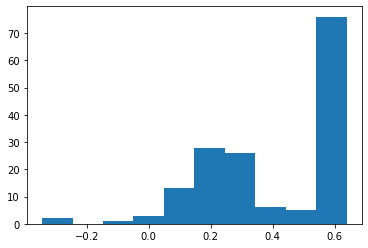

In [7]:
#pkl.dump(result,open("hyperparam_results.pkl","wb"))
result = pkl.load(open("hyperparam_results.pkl","rb"))

bestParams = list(result.keys())
bestParams.sort(key=lambda x: result[x],reverse=True)
print(bestParams[0])
bestParams = bestParams[0]
nBest = bestParams[0]
mBest = bestParams[1]
bestDepth = bestParams[2]
plt.hist(result.values())
#nBest,mBest,bestDepth = (100,51,200)


In [8]:
y_pred_test = RT_pred.fit_predict(X_train,y_train,X_test,nBest,mBest,bestDepth)

Text(0.5, 1.0, 'training: 0.937667268764795')

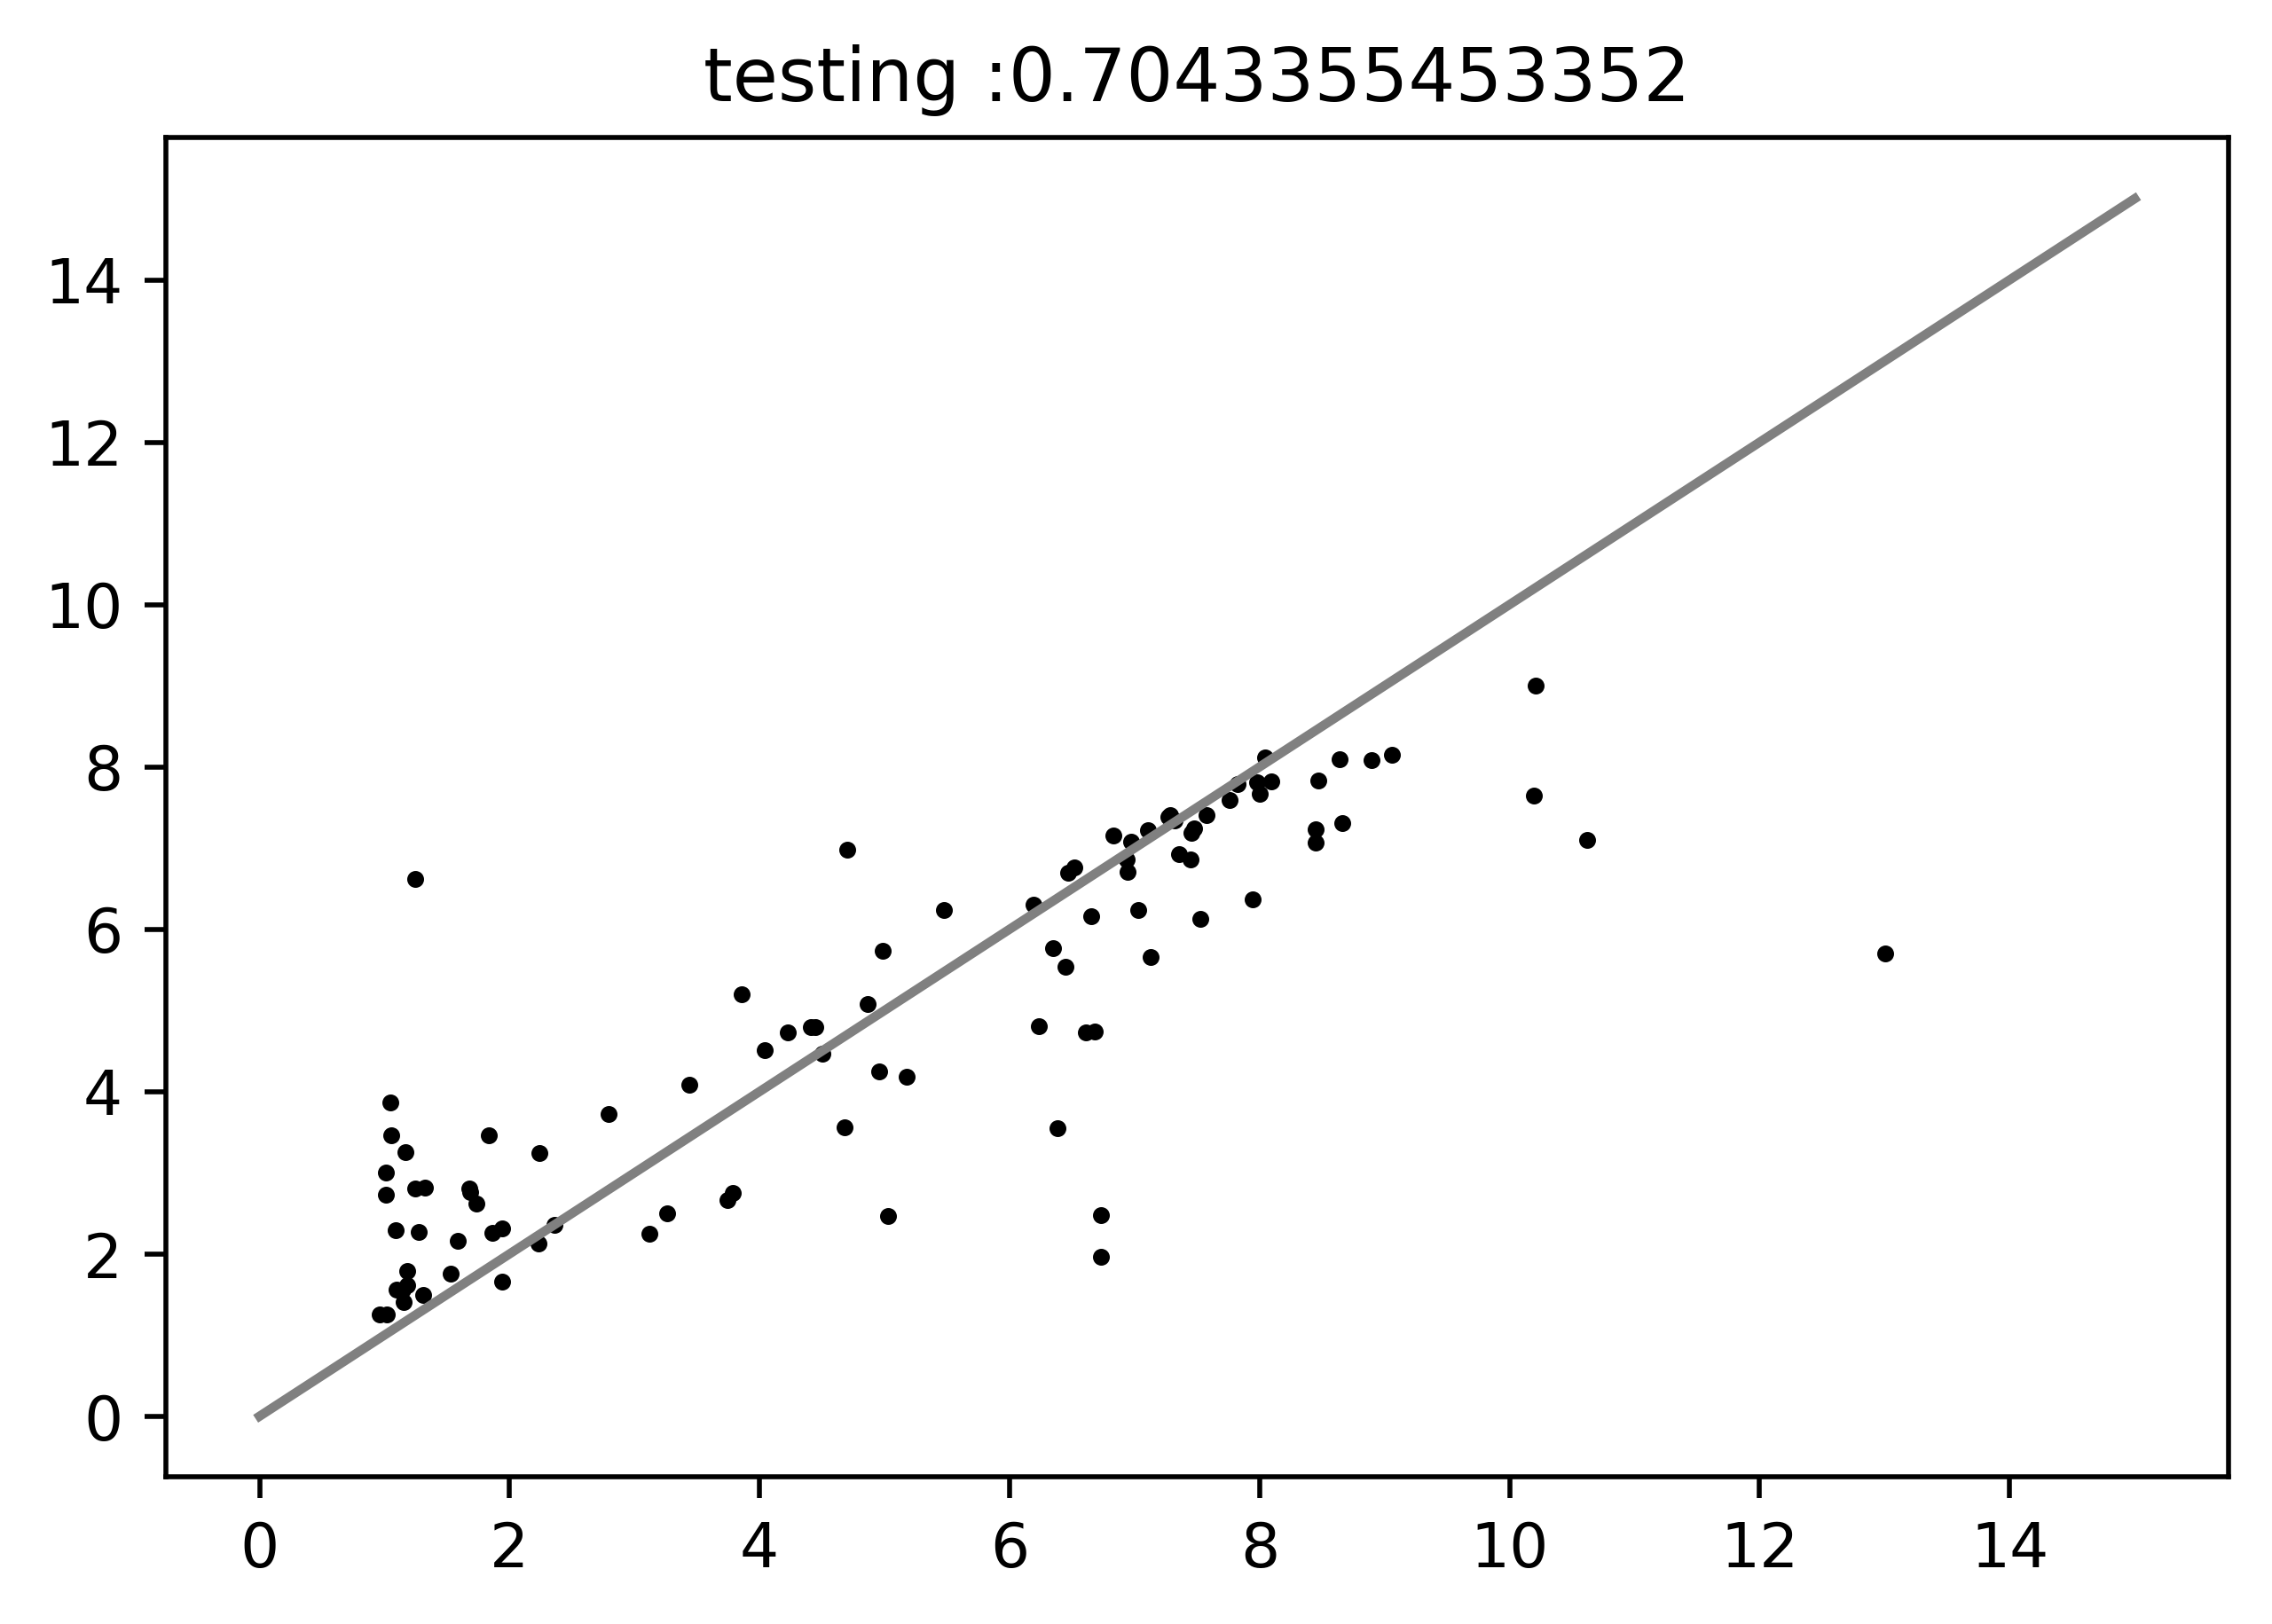

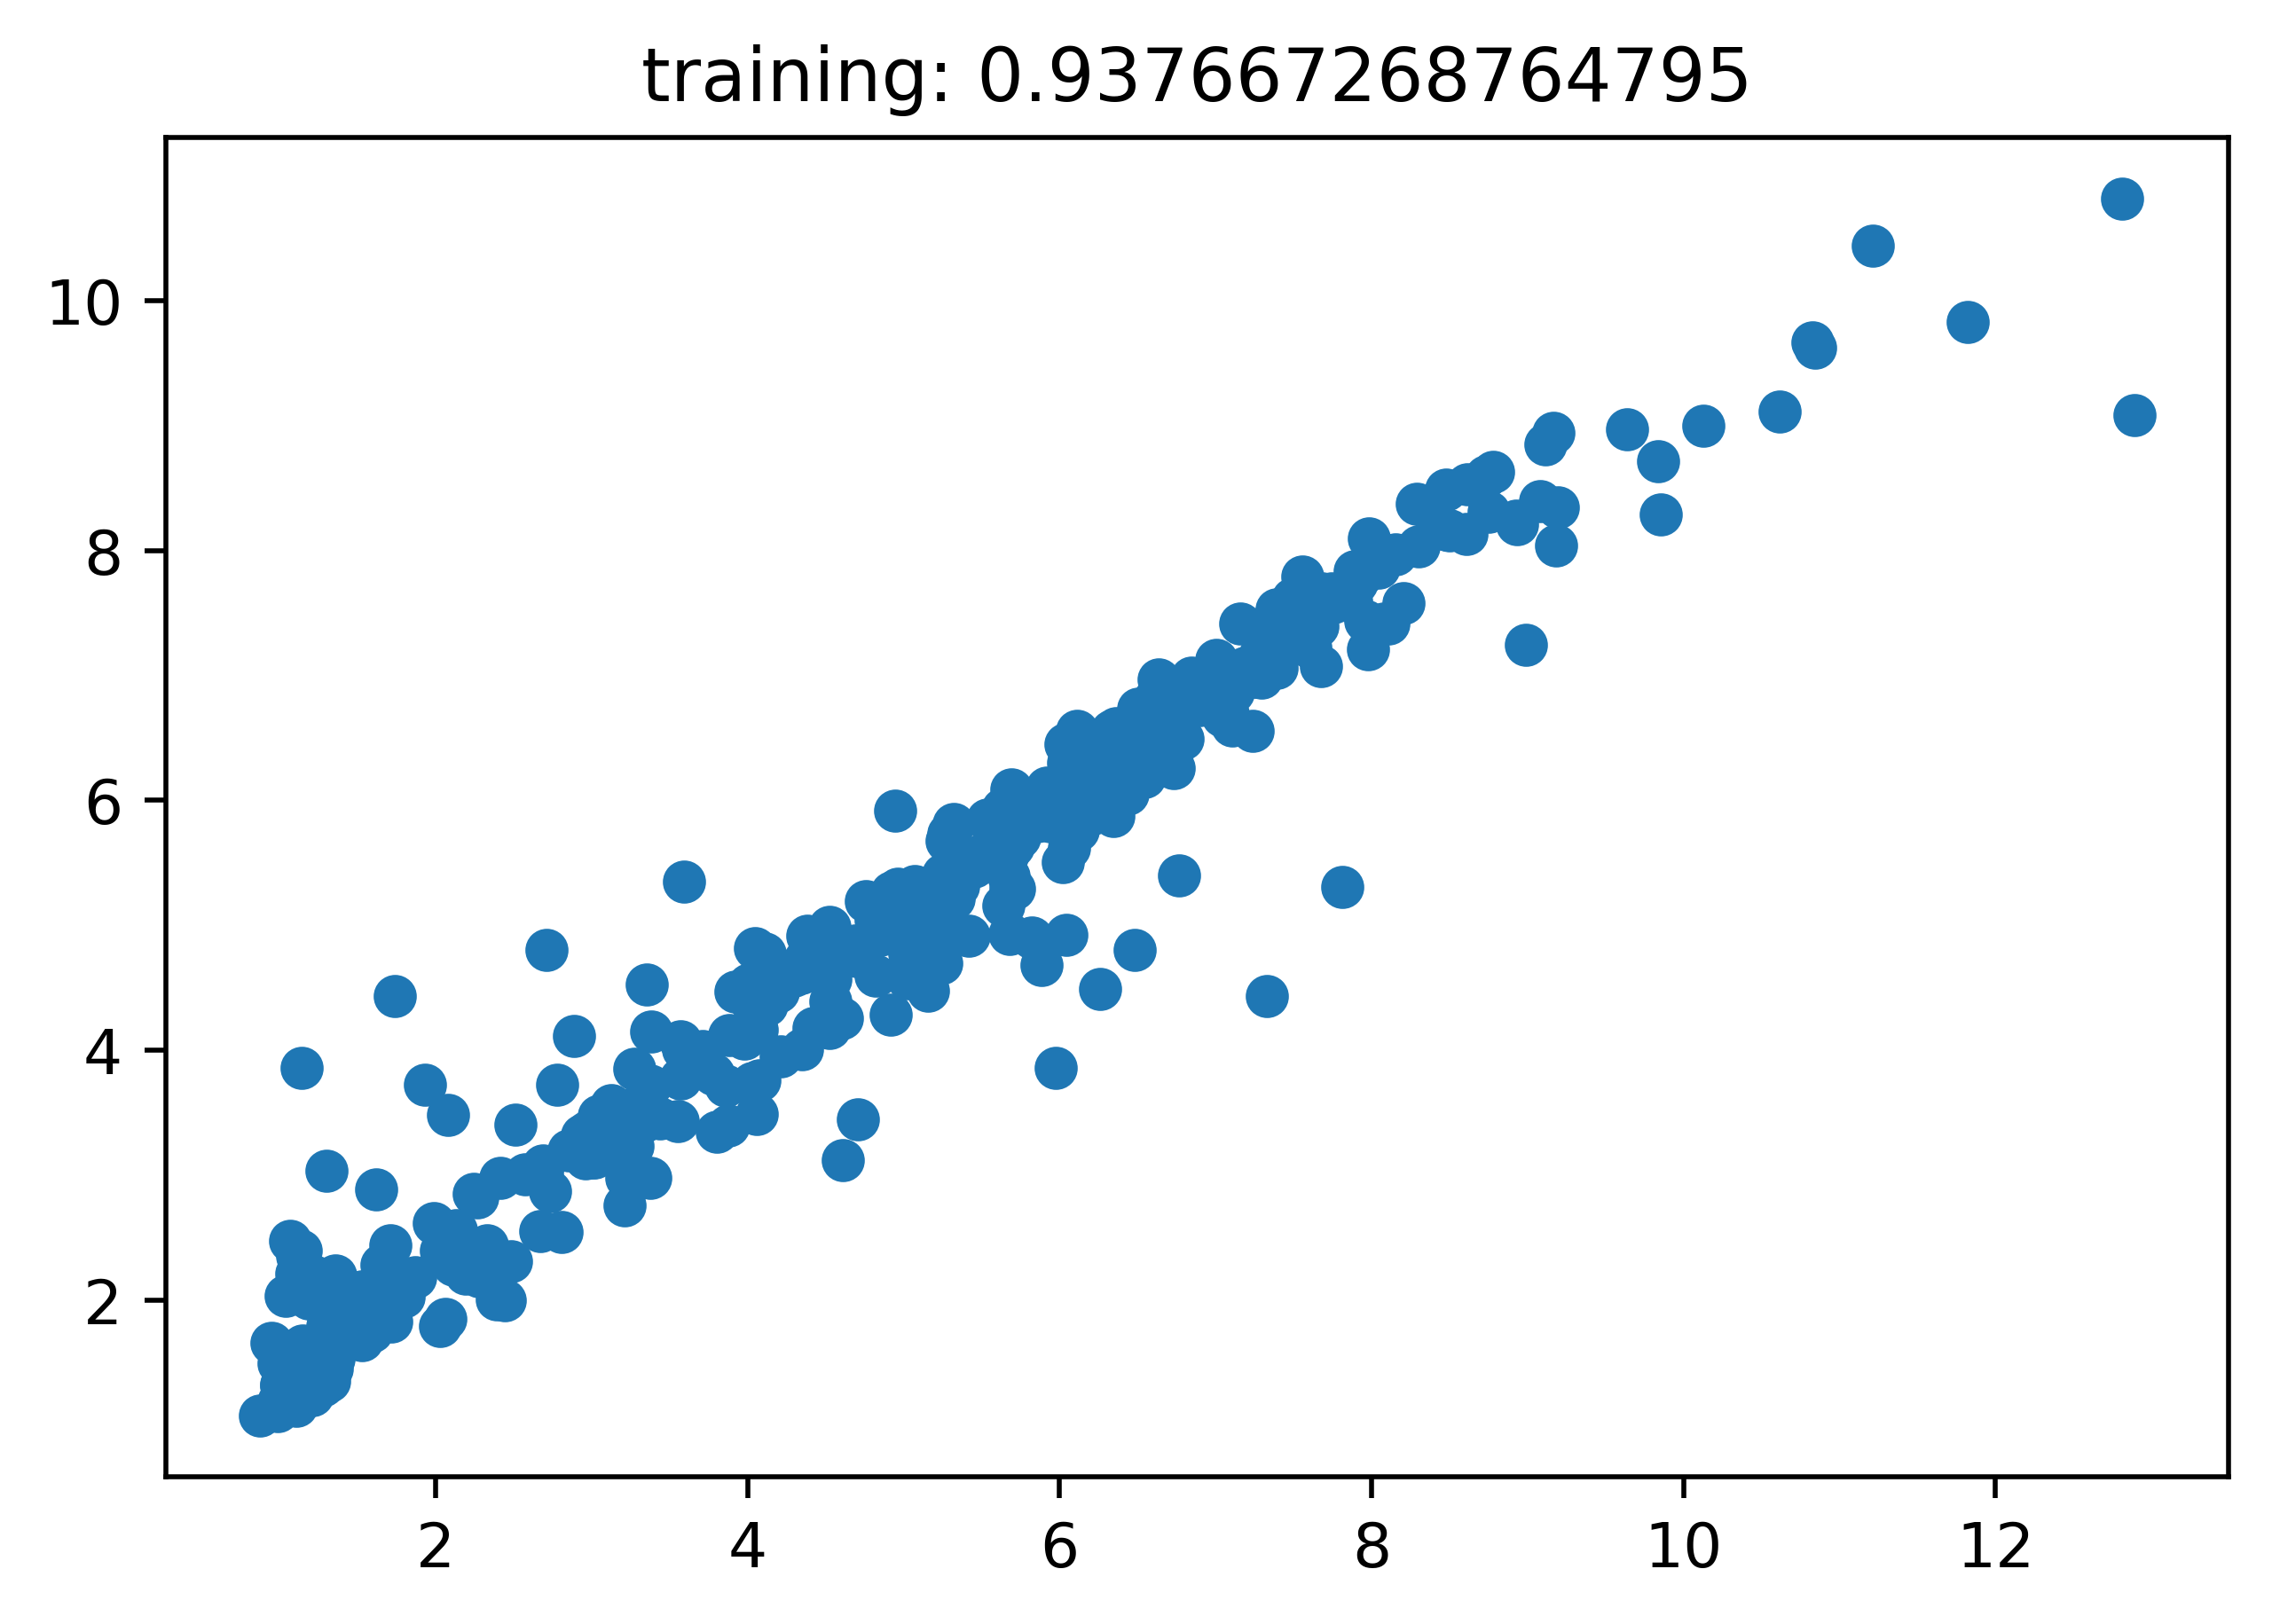

In [10]:
plt.scatter(y_test,y_pred_test,color="black",s=3)
plt.title("testing :" + str(r2_score(y_test, y_pred_test)))
plt.plot([0,15],[0,15],color="grey")
bestR2 = r2_score(y_test, y_pred_test)

plt.figure()
y_pred_train = RT_pred.predict(X_train)
plt.scatter(y_train,y_pred_train)
plt.title("training: " +str(r2_score(y_train, y_pred_train)))

In [18]:
r2s = []
numIters = 100
for x in range(numIters):
    yTemp = shuffle(y_train)
    y_pred = RT_pred.fit_predict(X_train,yTemp,X_test,nBest,mBest,bestDepth)
    r2s.append(r2_score(y_test,y_pred))
    

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Frequency')

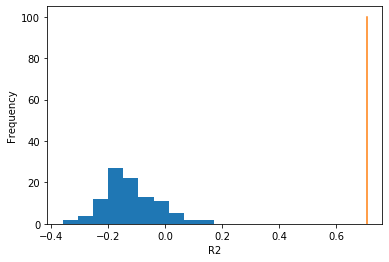

In [19]:
plt.hist(r2s,normed=False)
plt.plot([bestR2,bestR2],[0,100])
plt.xlabel("R2")
plt.ylabel("Frequency")